In [1]:
using DrWatson
@quickactivate "Simulation"
include(srcdir("Simulation.jl"))

Main.Simulation

In [1]:
Threads.nthreads()

1

In [3]:
import .Simulation as Sim

params = Sim.VarPar(
    max_ar=520,
    error=1e-7,
    t_coeff=0.5,
    temp=1e-7,
    voltage=range(0.05, 3.51, step=0.01),
    w=(-15.0, 15.0)
)
currents::Vector{Real} = zeros(length(params.voltage))

# check max_MAR
Sim.num_MAR(first(params.voltage), params)

47

In [4]:
Threads.@threads for i in 1:length(params.voltage)
    print("\r Processing: $(i) / $(length(params.voltage))")
    curr_v::Real = params.voltage[i]
    req_MAR::Int = Sim.num_MAR(curr_v, params)
    currents[i] = Real(Sim.∫(params, curr_v, req_MAR, 50))
    # print progress resetting line before printing
end

 Processing: 347 / 347

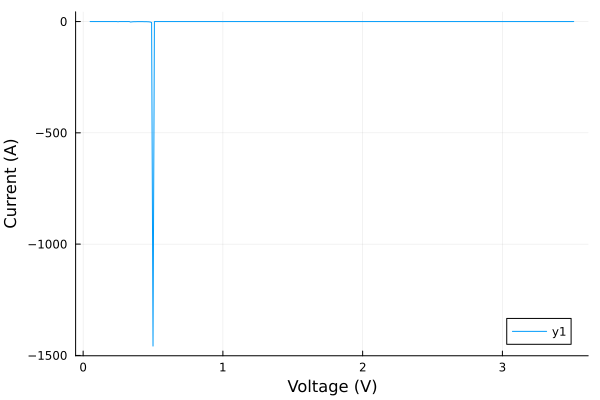

In [5]:
using Plots

plot(
    params.voltage,
    currents,
    xlabel="Voltage (V)",
    ylabel="Current (A)",
    grid=true,
)